# Anomaly Detect (One Class SVM)

## Load Data

In [71]:
import numpy as np
import pandas as pd

train_data = pd.read_csv('log10-ModelSource.csv')
train_data = train_data.drop(['FileName'], axis=1)
# train_data = train_data.T
print("Length of training data is: ",len(train_data))

val_data = pd.read_csv('log10-abnormal-tmp.csv')
val_data =val_data.drop(['FileName'], axis=1)
print("Length of validation data is: ",len(val_data))

test_data = pd.read_csv('log10-bands.csv')
test_data = test_data.drop(['FileName'], axis=1)
# test_data = test_data.T
print("Length of testing data is: ",len(test_data))

Length of training data is:  200
Length of validation data is:  6
Length of testing data is:  40


## Description

In [72]:
train_data.head(5)


,band_0,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_66,band_67,band_68,band_69,band_70,band_71,band_72,band_73,band_74,band_75
0,-2.140606,-2.392572,-2.516100,-2.577076,-2.215686,-1.551935,-1.065114,-1.582338,-1.940115,-2.035928,...,-3.543196,-3.402855,-3.341555,-2.516502,-3.472576,-3.521400,-3.618490,-3.894970,-3.687545,-3.859923
1,-2.062704,-2.312972,-2.434123,-2.495107,-2.141010,-1.462172,-0.988078,-1.507656,-1.872941,-1.959134,...,-3.497375,-3.329462,-3.186980,-2.461540,-3.396129,-3.434170,-3.556581,-3.859483,-3.597592,-3.789966
2,-3.235083,-3.480436,-3.596995,-3.666678,-3.293784,-2.637680,-2.143351,-2.664226,-3.039011,-3.120337,...,-4.621138,-4.498715,-4.443107,-3.615738,-4.551180,-4.608040,-4.722734,-4.986785,-4.769869,-4.941696
3,-2.188604,-2.446040,-2.556112,-2.618936,-2.258369,-1.598768,-1.076724,-1.618088,-1.987968,-2.101140,...,-3.578690,-3.450467,-3.365121,-2.598056,-3.526267,-3.556170,-3.686185,-3.936783,-3.733665,-3.890105
4,-2.203557,-2.414181,-2.589072,-2.625364,-2.278265,-1.600599,-1.092146,-1.646593,-2.005547,-2.127066,...,-3.582750,-3.452107,-3.364222,-2.658818,-3.549504,-3.569769,-3.687697,-3.936076,-3.786438,-3.897226


In [73]:
val_data.head(5)

,band_0,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_66,band_67,band_68,band_69,band_70,band_71,band_72,band_73,band_74,band_75
0,-3.541188,-3.683038,-4.014400,-4.446797,-4.256082,-4.335185,-4.294138,-4.138893,-4.229745,-4.663023,...,-5.135122,-5.162999,-5.165976,-5.175393,-5.253053,-5.342208,-5.206091,-5.021408,-5.190808,-5.206067
1,-3.496886,-3.680625,-3.976427,-4.559204,-4.265444,-4.231464,-4.102054,-4.066611,-4.035949,-4.542317,...,-5.072622,-5.094240,-5.099894,-5.092469,-5.147726,-5.103890,-5.134989,-4.962345,-5.097646,-5.116239
2,-5.275606,-5.454092,-5.761214,-6.344336,-6.066459,-5.992165,-5.979188,-5.858629,-5.773446,-6.229465,...,-6.859510,-6.934886,-6.947967,-6.894535,-6.981311,-6.876711,-6.933425,-6.774862,-6.947894,-6.911702
3,-3.509726,-3.675979,-3.979934,-4.531176,-4.301829,-4.142843,-4.161406,-4.009829,-3.957262,-4.450909,...,-5.166801,-5.105810,-5.035571,-5.027898,-5.150554,-5.134792,-5.136422,-5.085507,-5.068070,-5.010826
4,-3.449373,-3.608365,-3.905858,-4.508138,-4.298907,-4.280539,-4.206234,-4.103736,-3.993464,-4.448728,...,-5.148335,-5.185113,-5.141043,-5.080646,-5.136030,-5.188642,-5.207023,-5.125365,-5.120396,-5.114300


In [74]:
test_data.head(5)

,band_0,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_66,band_67,band_68,band_69,band_70,band_71,band_72,band_73,band_74,band_75
0,-3.209271,-3.373951,-3.564475,-3.582311,-3.231398,-2.532224,-2.047849,-2.583436,-2.972175,-3.033713,...,-4.541804,-4.405419,-4.348797,-3.536192,-4.479900,-4.556176,-4.639062,-4.906409,-4.759218,-4.858519
1,-2.158462,-2.405923,-2.539009,-2.586223,-2.219559,-1.559839,-1.023825,-1.558837,-1.940159,-2.046956,...,-3.568118,-3.396578,-3.307529,-2.556006,-3.466016,-3.499789,-3.647007,-3.896603,-3.724622,-3.843351
2,-3.306858,-3.462643,-3.661137,-3.649136,-3.314298,-2.652038,-2.148081,-2.668363,-3.021900,-3.137207,...,-4.616042,-4.479508,-4.427562,-3.598701,-4.546858,-4.614990,-4.706856,-4.960348,-4.829615,-4.925240
3,-2.137238,-2.303157,-2.494844,-2.522207,-2.165742,-1.468406,-0.986274,-1.524995,-1.909823,-1.968442,...,-3.442577,-3.350640,-3.251533,-2.498977,-3.428864,-3.475610,-3.600546,-3.835775,-3.694895,-3.814712
4,-2.174087,-2.419667,-2.548403,-2.603956,-2.226686,-1.578004,-1.040546,-1.574019,-1.956311,-2.054622,...,-3.569160,-3.417698,-3.375710,-2.555671,-3.479413,-3.526721,-3.647296,-3.900911,-3.732769,-3.860128


## Declare SVM

In [75]:
"""
nu: float, optional
    An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors.
    Should be in the interval (0, 1]. By default 0.5 will be taken.

gamma: {‘scale’, ‘auto’} or float, optional (default=’scale’)
    Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
"""
from sklearn.svm import OneClassSVM

one_svm = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)

## Fitting

In [76]:
one_class_svm = one_svm.fit(train_data)

## Validating

In [93]:
val_results = one_class_svm.predict(val_data)
val_results

array([-1, -1, -1, -1, -1, -1])

In [107]:
assert (val_results==-1).all(), "Wrong Answer"

## Testing

In [108]:
test_results = one_class_svm.predict(test_data)
test_results

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1])

In [118]:
assert (test_results[:10]==1).all() & (test_results[11:]==-1).all(), "Wrong Answer"

## Graphing

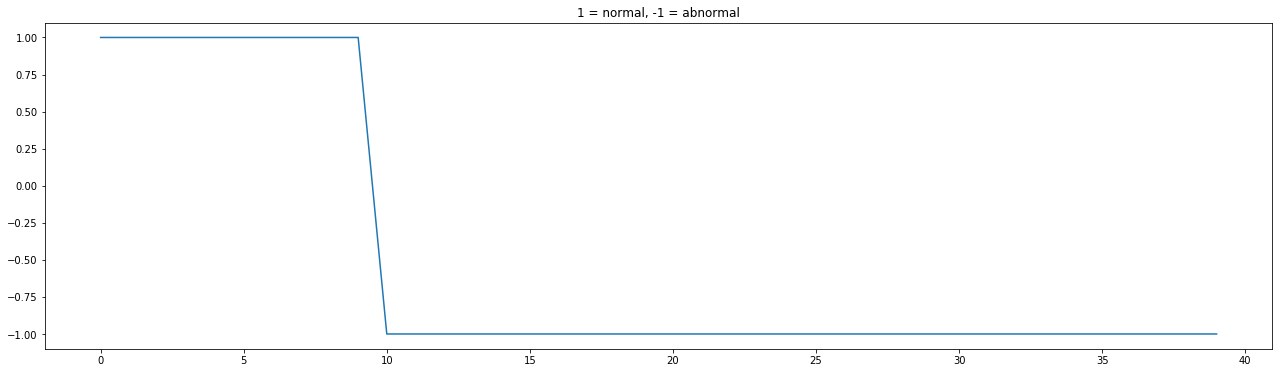

In [123]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(22, 6))

plt.plot(test_results)

plt.title('1 = normal, -1 = abnormal')
plt.show()